In [3]:
import os

In [4]:
cog_data_dir = "/home/ashish/Documents/github/VA/data/cognitive_data"
phy_data_dir = "/home/ashish/Documents/github/VA/data/physical_data"

In [6]:
session_counter = 0
for user_id in range(1, 10):
    user_dir = os.path.join(cog_data_dir, f"user_{user_id}")
    for session in os.listdir(user_dir):
        session_dir = os.path.join(user_dir, session)
        for block in os.listdir(session_dir):
            # Sanity check if the directory has the name "block" or not
            if "block" not in block or "practice" in block.lower():
                # Ignore directories other than block
                continue
            block_dir = os.path.join(session_dir, block)
            eeg_dir = os.path.join(block_dir, "eeg")
            eeg_path = os.path.join(eeg_dir, os.listdir(eeg_dir)[0])
            print(f"{session_counter+1}. Session: {session[-1]} | User_ID: {user_id} | EEG_path: {eeg_path}")
            session_counter += 1
            break
        break
    break

1. Session: 1 | User_ID: 1 | EEG_path: /home/ashish/Documents/github/VA/data/cognitive_data/user_1/session_1/block3_2/eeg/1_3_2


In [23]:
def read_eeg_bands(eeg_path):
    bands = {
        'a': [], 'b': [], 'd': [], 'g': [], 't': [],
        'Aa': [], 'Ab': [], 'Ad': [], 'Ag': [], 'At': [],
        'as': [], 'bs': [], 'ds': [], 'gs': [], 'ts': [],
    }
    with open(eeg_path, 'r') as file:
        for line in file.readlines():
            values = line.split()
            if not values:
                continue
                
            if values[0] in bands.keys():
                bands[values[0]].append(list(map(lambda x: float(x), values[1:])))
                
    return bands

In [24]:
def store_bands_to_csv(bands):
    pass

In [28]:
bands = read_eeg_bands(eeg_path)
for band in bands:
    print(f'{band}: {len(bands[band])}')

a: 1751
b: 1751
d: 1751
g: 1751
t: 1751
Aa: 1751
Ab: 1751
Ad: 1751
Ag: 1751
At: 1751
as: 1751
bs: 1751
ds: 1751
gs: 1751
ts: 1751


## Plot these bands separately

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

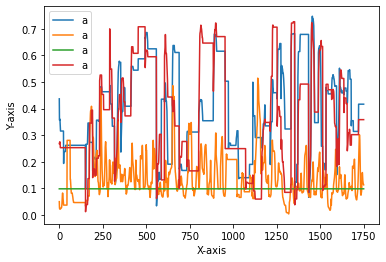

In [33]:
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
x = list(range(len(bands['a'])))
for band in bands:
    plt.plot(x, bands[band], label=band)
    break
    
plt.legend()
plt.show()

In [19]:
eeg_data_file = '/home/ashish/Documents/github/VA/data/cognitive_data/user_3/session_2/block5_2/eeg/3_5_2.csv'

In [20]:
import pandas as pd

In [21]:
X = pd.read_csv(eeg_data_file)
X.head()

,timestep,alpha_1,alpha_2,alpha_3,alpha_4,beta_1,beta_2,beta_3,beta_4,delta_1,...,gamma_4,theta_1,theta_2,theta_3,theta_4,h_1,h_2,h_3,h_4,c
0,1,0.533801,0.152233,0.527005,0.502897,0.085075,0.199896,0.060474,0.083847,0.174264,...,0.017183,0.166593,0.094685,0.143402,0.212845,1.0,1.0,1.0,1.0,0.0
1,2,0.535704,0.159191,0.523280,0.472833,0.082924,0.191909,0.060528,0.087289,0.174450,...,0.017469,0.167085,0.096550,0.144571,0.219618,1.0,1.0,1.0,1.0,0.0
2,3,0.515702,0.160387,0.517091,0.443619,0.085186,0.180666,0.061061,0.088597,0.181282,...,0.017437,0.176282,0.096099,0.147239,0.224494,1.0,1.0,1.0,1.0,0.0
3,4,0.484252,0.152514,0.502802,0.426192,0.090764,0.168153,0.062579,0.085724,0.189963,...,0.017149,0.190862,0.093934,0.151388,0.224120,1.0,1.0,1.0,1.0,0.0
4,5,0.513845,0.144562,0.478873,0.460816,0.088196,0.156288,0.065014,0.075329,0.174497,...,0.015715,0.182362,0.090849,0.155510,0.204213,1.0,1.0,1.0,1.0,0.0


<AxesSubplot:xlabel='timestep'>

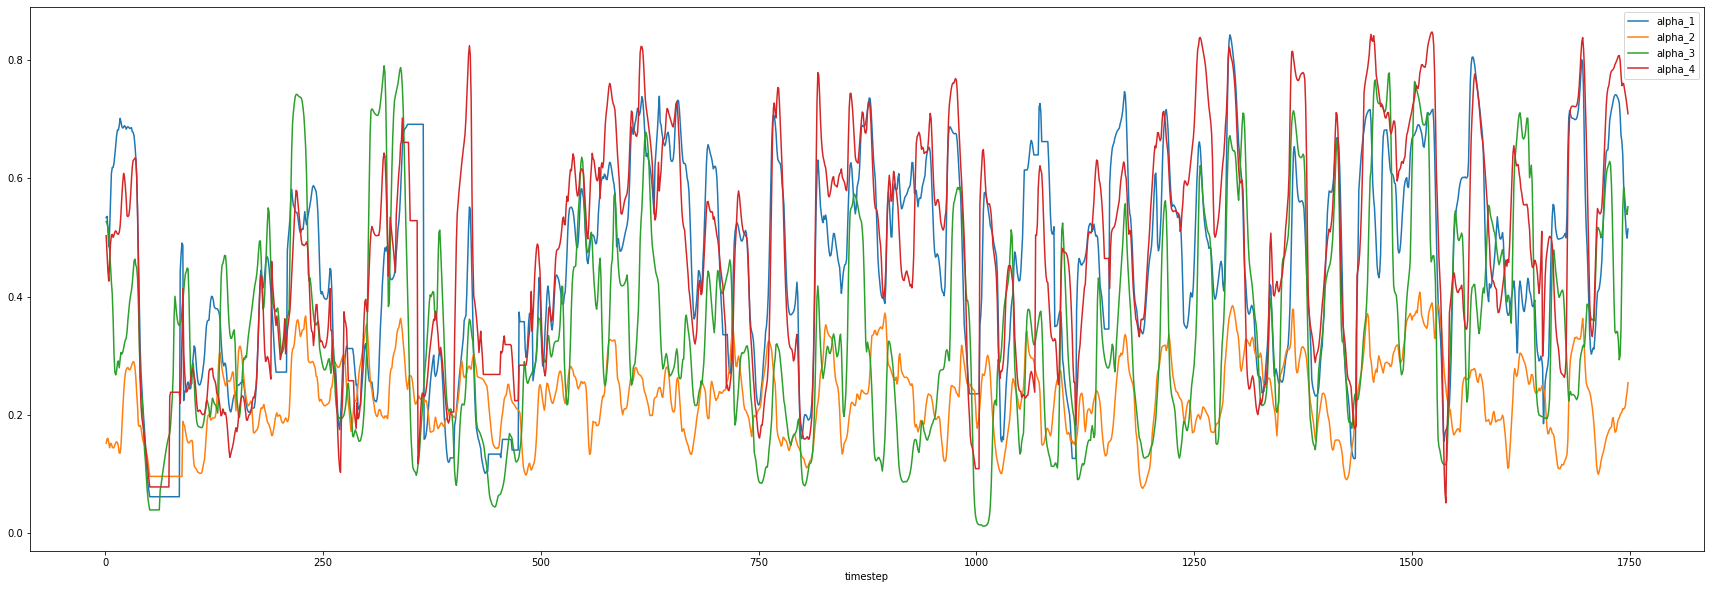

In [22]:
X.plot(x="timestep", y=["alpha_1", "alpha_2", "alpha_3", "alpha_4"], figsize=(30, 10))

<AxesSubplot:xlabel='timestep'>

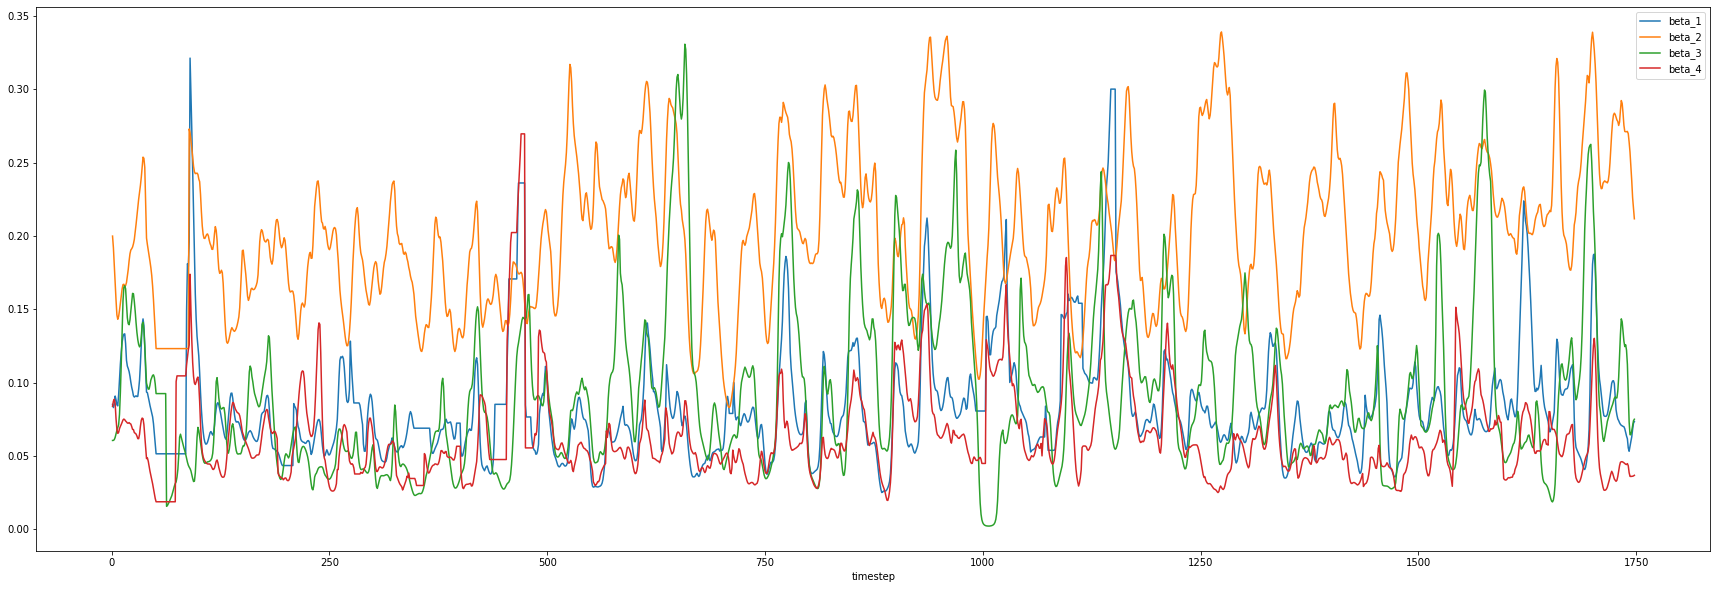

In [23]:
X.plot(x="timestep", y=["beta_1", "beta_2", "beta_3", "beta_4"], figsize=(30, 10))

<AxesSubplot:xlabel='timestep'>

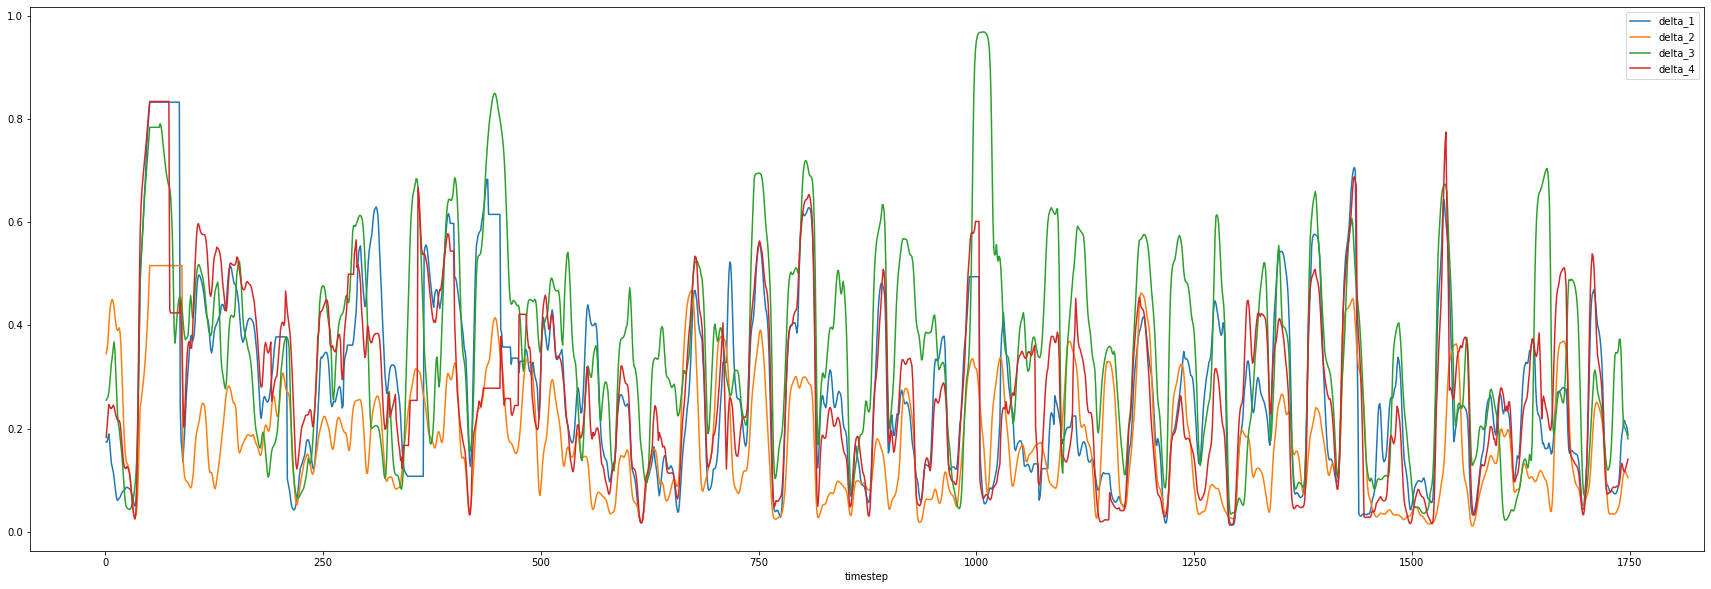

In [24]:
X.plot(x="timestep", y=["delta_1", "delta_2", "delta_3", "delta_4"], figsize=(30, 10))

<AxesSubplot:xlabel='timestep'>

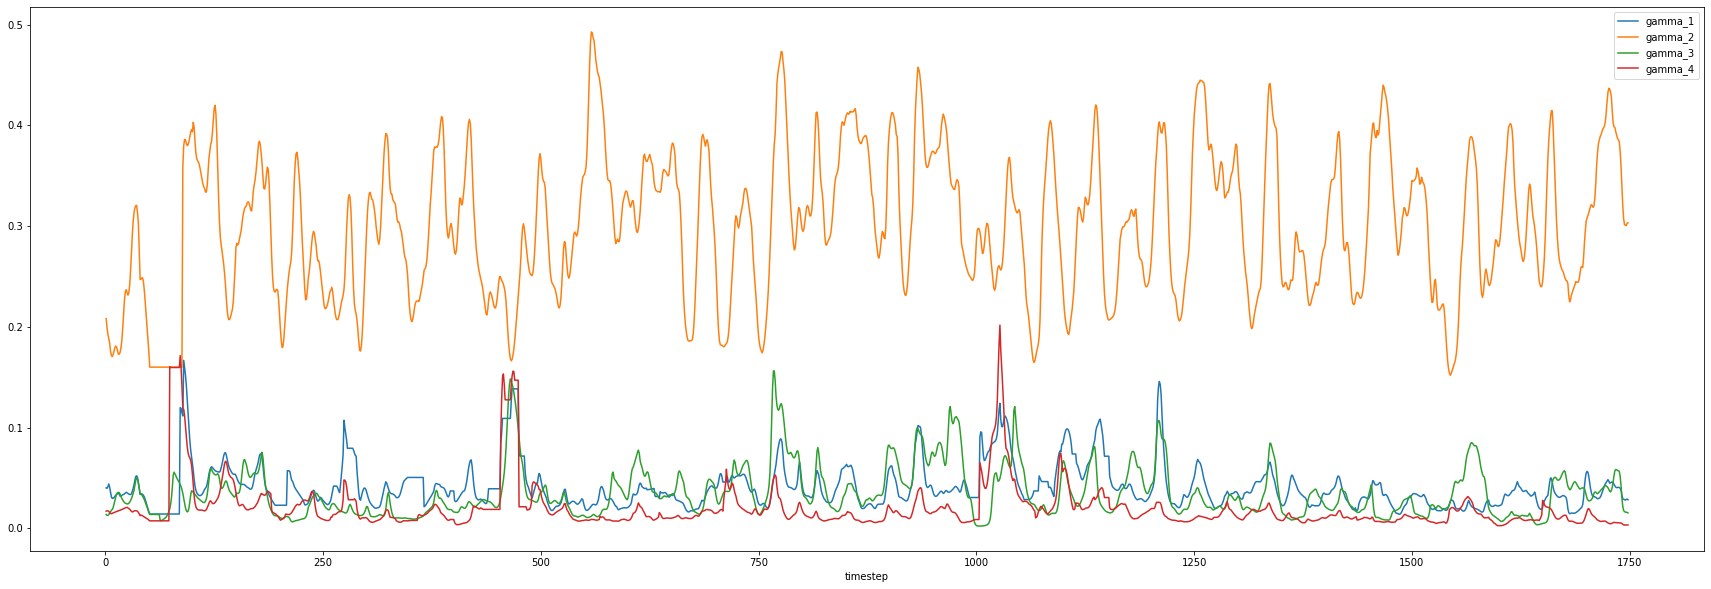

In [25]:
X.plot(x="timestep", y=["gamma_1", "gamma_2", "gamma_3", "gamma_4"], figsize=(30, 10))

<AxesSubplot:xlabel='timestep'>

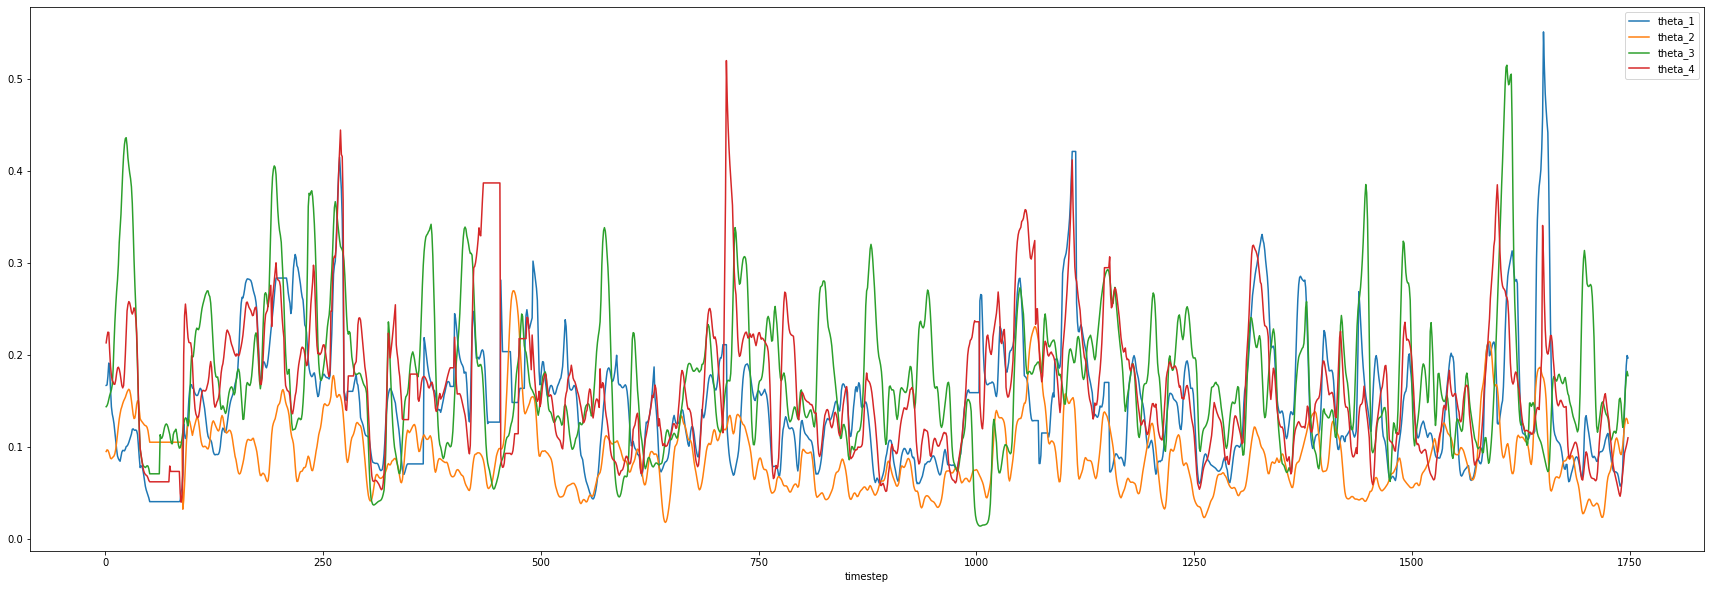

In [26]:
X.plot(x="timestep", y=["theta_1", "theta_2", "theta_3", "theta_4"], figsize=(30, 10))

# Outlier Detection and Missing Values

## Mixture Model

- The mixture model is a distribution based outlier detection algorithm, where generally, a combination of distributions are used to fit to the data. Each datapoint which is considerably far away from the fitted combination of distributions is considered an outlier. It can be said that the mixture model is a more complex version of Chauvenet’s criterion, which is used in the same manner, but with only one single distribution to fit the data.

- The distributions of a mixture model will be weighted to maximize the product of the probabilities of observing our feature values. The number of distributions is chosen by the user. In this case, we go with the author who used 3 distributions.

In [10]:
##############################################################
#                                                            #
#    Mark Hoogendoorn and Burkhardt Funk (2017)              #
#    Machine Learning for the Quantified Self                #
#    Springer                                                #
#    Chapter 3                                               #
#                                                            #
##############################################################

import scipy
import math
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd
import util.util as util
import copy

# Class for outlier detection algorithms based on some distribution of the data. They
# all consider only single points per row (i.e. one column)
class DistributionBasedOutlierDetection:

    # Finds outliers in the specified column of datatable and adds a binary column with
    # the same name extended with '_outlier' that expresses the result per data point.
    def chauvenet(self, data_table, col, c):
        # Taken partly from: https://www.astro.rug.nl/software/kapteyn/
        # Computer the mean and standard deviation.
        mean = data_table[col].mean()
        std = data_table[col].std()
        N = len(data_table.index)
        criterion = 1.0/(c*N)

        # Consider the deviation for the data points.
        deviation = abs(data_table[col] - mean)/std

        # Express the upper and lower bounds.
        low = -deviation/math.sqrt(c)
        high = deviation/math.sqrt(c)
        prob = []
        mask = []

        # Pass all rows in the dataset.
        for i in range(0, len(data_table.index)):
            # Determine the probability of observing the point
            prob.append(
                1.0 - 0.5 * (scipy.special.erf(high[i]) - scipy.special.erf(low[i])))
            # And mark as an outlier when the probability is below our criterion.
            mask.append(prob[i] < criterion)
        data_table[col + '_outlier'] = mask
        return data_table

    # Fits a mixture model towards the data expressed in col and adds a column with the probability
    # of observing the value given the mixture model.
    def mixture_model(self, data_table, col, n_components):
        #print('Applying mixture models')
        # Fit a mixture model to our data.
        data = data_table[data_table[col].notnull()][col]
        g = GaussianMixture(n_components, max_iter=100, n_init=1)
        reshaped_data = np.array(data.values.reshape(-1, 1))
        g.fit(reshaped_data)

        # Predict the probabilities
        probs = g.score_samples(reshaped_data)

        # Create the right data frame and concatenate the two.
        data_probs = pd.DataFrame(
            np.power(10, probs), index=data.index, columns=[col+'_mixture'])

        data_table = pd.concat([data_table, data_probs], axis=1)

        return data_table


# Class for distance based outlier detection.
class DistanceBasedOutlierDetection:

    # Create distance table between rows in the data table. Here, only cols are considered and the specified
    # distance function is used to compute the distance.
    def distance_table(self, data_table, cols, d_function):

        data_table[cols] = data_table.loc[:, cols].astype('float32')

        return pd.DataFrame(scipy.spatial.distance.squareform(util.distance(data_table.loc[:, cols], d_function)),
                            columns=data_table.index, index=data_table.index).astype('float32')

    # The most simple distance based algorithm. We assume a distance function, e.g. 'euclidean'
    # and a minimum distance of neighboring points and frequency of occurrence.
    def simple_distance_based(self, data_table, cols, d_function, dmin, fmin):
        print('Calculating simple distance-based criterion.')

        # Normalize the dataset first.
        new_data_table = util.normalize_dataset(
            data_table.dropna(axis=0, subset=cols), cols)

        # Create the distance table first between all instances:
        self.distances = self.distance_table(new_data_table, cols, d_function)

        mask = []
        # Pass the rows in our table.
        for i in range(0, len(new_data_table.index)):
            # Check what faction of neighbors are beyond dmin.
            frac = (float(sum([1 for col_val in self.distances.iloc[i, :].tolist(
            ) if col_val > dmin]))/len(new_data_table.index))
            # Mark as an outlier if beyond the minimum frequency.
            mask.append(frac > fmin)
        data_mask = pd.DataFrame(mask, index=new_data_table.index, columns=[
                                 'simple_dist_outlier'])
        data_table = pd.concat([data_table, data_mask], axis=1)
        del self.distances
        return data_table

    # Computes the local outlier factor. K is the number of neighboring points considered, d_function
    # the distance function again (e.g. 'euclidean').
    def local_outlier_factor(self, data_table, cols, d_function, k):
        # Inspired by https://github.com/damjankuznar/pylof/blob/master/lof.py
        # but tailored towards the distance metrics and data structures used here.

        print("Calculating local outlier factor.")

        # Normalize the dataset first.
        new_data_table = util.normalize_dataset(
            data_table.dropna(axis=0, subset=cols), cols)
        # Create the distance table first between all instances:
        self.distances = self.distance_table(new_data_table, cols, d_function)

        outlier_factor = []
        # Compute the outlier score per row.
        for i in range(0, len(new_data_table.index)):
            if i % 100 == 0: print(f'Completed {i} steps for LOF.')
            outlier_factor.append(self.local_outlier_factor_instance(i, k))
        data_outlier_probs = pd.DataFrame(
            outlier_factor, index=new_data_table.index, columns=['lof'])
        data_table = pd.concat([data_table, data_outlier_probs], axis=1)
        del self.distances
        return data_table

    # The distance between a row i1 and i2.
    def reachability_distance(self, k, i1, i2):
        # Compute the k-distance of i2.
        k_distance_value, neighbors = self.k_distance(i2, k)
        # The value is the max of the k-distance of i2 and the real distance.
        return max([k_distance_value, self.distances.iloc[i1, i2]])

    HIGH_VALUE = 10000

   # Compute the local reachability density for a row instance, given a k-distance and set of neighbors.
    def local_reachability_density(self, instance, k, k_distance_i, neighbors_i):
        # Set distances to neighbors to 0.
        reachability_distances_array = [0]*len(neighbors_i)

        # Compute the reachability distance between i and all neighbors.
        for i, neighbor in enumerate(neighbors_i):
            reachability_distances_array[i] = self.reachability_distance(k, instance, neighbor)
        if (not any(reachability_distances_array)) or (sum(reachability_distances_array) == 0):
            return float(self.HIGH_VALUE)
        else:
            # Return the number of neighbors divided by the sum of the reachability distances.
            return len(neighbors_i) / sum(reachability_distances_array)

    # Compute the k-distance of a row i, namely the maximum distance within the k nearest neighbors
    # and return a tuple containing this value and the neighbors within this distance.
    def k_distance(self, i, k):
        # Simply look up the values in the distance table, select the min_pts^th lowest value and take the value pairs
        # Take min_pts + 1 as we also have the instance itself in there.
        neighbors = np.argpartition(np.array(self.distances.iloc[i,:]), k+1)[0:(k+1)].tolist()
        if i in neighbors:
            neighbors.remove(i)
        return max(self.distances.iloc[i,neighbors]), neighbors

    # Compute the local outlier score of our row i given a setting for k.
    def local_outlier_factor_instance(self, i, k):
        # Compute the k-distance for i.
        k_distance_value, neighbors = self.k_distance(i, k)
        # Computer the local reachability given the found k-distance and neighbors.
        instance_lrd = self.local_reachability_density(i, k, k_distance_value, neighbors)
        lrd_ratios_array = [0] * len(neighbors)

        # Computer the k-distances and local reachability density of the neighbors
        for i, neighbor in enumerate(neighbors):
            k_distance_value_neighbor, neighbors_neighbor = self.k_distance(neighbor, k)
            neighbor_lrd = self.local_reachability_density(neighbor, k, k_distance_value_neighbor, neighbors_neighbor)
            # Store the ratio between the neighbor and the row i.
            lrd_ratios_array[i] = neighbor_lrd / instance_lrd

        # Return the average ratio.
        return sum(lrd_ratios_array) / len(neighbors)


ModuleNotFoundError: No module named 'util'